# AMCAT Data Analysis

## Loading the required libraries and the dataset (AMCAT_DATA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
PATH = r'/content/drive/MyDrive/Colab Notebooks/data/Amcat_dataset.xlsx'
amcat_df = pd.read_excel(PATH)

In [ ]:
amcat_df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
amcat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [ ]:
amcat_df.shape

(3998, 39)

## Data Preparation and Cleaning Stage:
- Check Missing values
- Check Duplicates
- Check Columns
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column.
- Drop unnecessary columns

In [ ]:
# Checking the missing values
amcat_df.isna().sum()

,0
Unnamed: 0,0
ID,0
Salary,0
DOJ,0
DOL,0
Designation,0
JobCity,0
Gender,0
DOB,0
10percentage,0


In [ ]:
# Checking Duplicates
amcat_df.duplicated().sum()

0

In [ ]:
# Checking the columns
amcat_df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [ ]:
# Removing the 'Unnamed: 0' column
amcat_df.drop('Unnamed: 0',axis=1, inplace=True)
amcat_df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
# checking the datatypes
amcat_df.dtypes

,0
ID,int64
Salary,int64
DOJ,datetime64[ns]
DOL,object
Designation,object
JobCity,object
Gender,object
DOB,datetime64[ns]
10percentage,float64
10board,object


In [ ]:
# Counting the number of values in each column
count_data_columns = {}

for column in amcat_df.columns:
    unique_values = amcat_df[column].nunique()
    count_data_columns[column] = unique_values

for idx, element in count_data_columns.items():
  print(f"{idx}: {element}")

ID: 3998
Salary: 177
DOJ: 81
DOL: 67
Designation: 419
JobCity: 339
Gender: 2
DOB: 1872
10percentage: 851
10board: 275
12graduation: 16
12percentage: 801
12board: 340
CollegeID: 1350
CollegeTier: 2
Degree: 4
Specialization: 46
collegeGPA: 1282
CollegeCityID: 1350
CollegeCityTier: 2
CollegeState: 26
GraduationYear: 11
English: 111
Logical: 107
Quant: 138
Domain: 243
ComputerProgramming: 79
ElectronicsAndSemicon: 29
ComputerScience: 20
MechanicalEngg: 42
ElectricalEngg: 31
TelecomEngg: 26
CivilEngg: 23
conscientiousness: 141
agreeableness: 149
extraversion: 154
nueroticism: 217
openess_to_experience: 142


In [ ]:
# Check the statistical measures of dataset
amcat_df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,3998.0,663794.54052,11244.0,334284.25,639600.0,990480.0,1298275.0,363218.245829
Salary,3998.0,307699.849925,35000.0,180000.0,300000.0,370000.0,4000000.0,212737.499957
DOJ,3998,2013-07-02 11:04:10.325162496,1991-06-01 00:00:00,2012-10-01 00:00:00,2013-11-01 00:00:00,2014-07-01 00:00:00,2015-12-01 00:00:00,NaN
DOB,3998,1990-12-06 06:01:15.637819008,1977-10-30 00:00:00,1989-11-16 06:00:00,1991-03-07 12:00:00,1992-03-13 18:00:00,1997-05-27 00:00:00,NaN
10percentage,3998.0,77.925443,43.0,71.68,79.15,85.67,97.76,9.850162
12graduation,3998.0,2008.087544,1995.0,2007.0,2008.0,2009.0,2013.0,1.653599
12percentage,3998.0,74.466366,40.0,66.0,74.4,82.6,98.7,10.999933
CollegeID,3998.0,5156.851426,2.0,494.0,3879.0,8818.0,18409.0,4802.261482
CollegeTier,3998.0,1.925713,1.0,2.0,2.0,2.0,2.0,0.26227
collegeGPA,3998.0,71.486171,6.45,66.4075,71.72,76.3275,99.93,8.167338


In [ ]:
# Drop unnecessary columns
amcat_df = amcat_df.drop(columns=['ID','CollegeID','CollegeCityID'])
amcat_df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
def datatype_of_cols(df):
  # Check various categories present in the different categorical column
  # define numerical and catagorical columns
  numerical_columns= [feature for feature in df.columns if amcat_df[feature].dtypes != 'O']
  categorical_columns = [feature for feature in df.columns if amcat_df[feature].dtypes =='O']
  print(f"Number of numerical columns are {len(numerical_columns)}.")
  print(f"Number of categorical columns are {len(categorical_columns)}.")

datatype_of_cols(amcat_df)

Number of numerical columns are 26.
Number of categorical columns are 9.


## Univariate Analysis
## Question : What is the distribution of Salary?

In [ ]:
amcat_df['Salary'].describe().T

,Salary
count,3.998000e+03
mean,3.076998e+05
std,2.127375e+05
min,3.500000e+04
25%,1.800000e+05
50%,3.000000e+05
75%,3.700000e+05
max,4.000000e+06


### Exploring Data (Visualization)
- Visualize average score distribution to make some conclusion using various plots like Histogram or Kernel Distribution Function (KDE).
- The KDE plot helps us understand the distribution pattern of these top salaries.

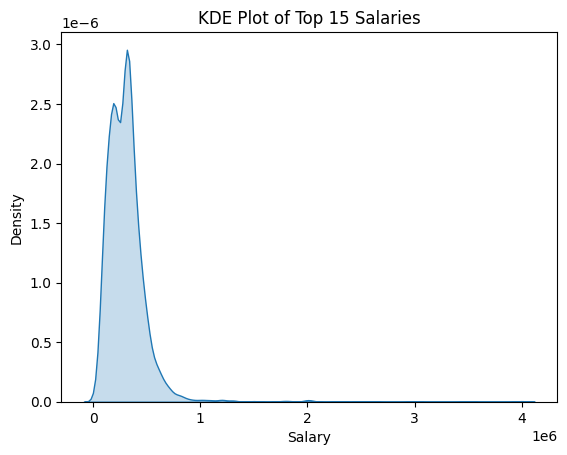

In [ ]:
# Plotting the Salary to see the salary distribution.
# Create a KDE plot
sns.kdeplot(amcat_df['Salary'], shade=True)

# Add labels and title
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('KDE Plot of Top 15 Salaries')

# Display the plot
plt.show()

### Key Insights:
- In between 0 to 100000 the salaries are more compared to other salaries.
- After 300000 there are less salries.

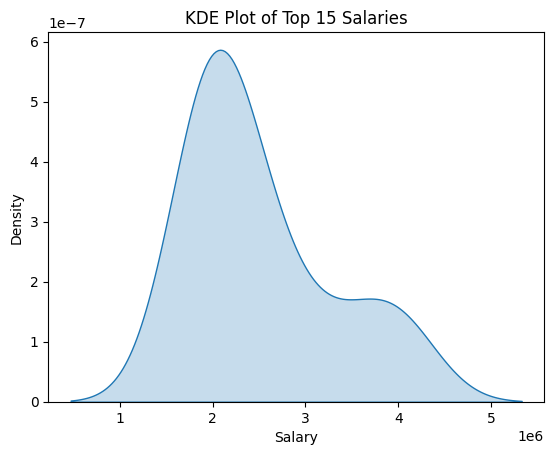

In [ ]:
# Let's further explore the Salary column.
# Sort the Salary column in descending order and select the top 15 values
top_15_salaries = amcat_df['Salary'].sort_values(ascending=False).head(15)

# Convert salary to millions
top_15_salaries_in_millions = top_15_salaries

# Create a KDE plot
sns.kdeplot(top_15_salaries_in_millions, shade=True)

# Add labels and title
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('KDE Plot of Top 15 Salaries')

# Display the plot
plt.show()

### Key Insights:
- The majority of the top 15 salaries are around 2 million (highest peak).
- There are fewer people earning higher salaries closer to 5 million, as indicated by the decreasing tail on the right.


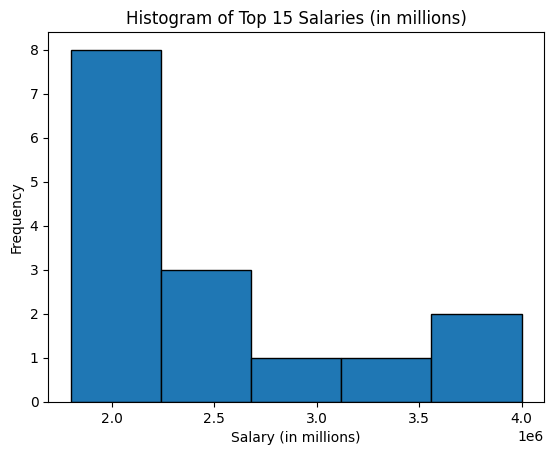

In [ ]:
# Create a histogram
plt.hist(top_15_salaries_in_millions, bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Salary (in millions)')
plt.ylabel('Frequency')
plt.title('Histogram of Top 15 Salaries (in millions)')

# Display the plot
plt.show()

### Key Insights:
- Above histogram is also stating that the out of top 15 people, most of them are earning around 2 million to 2.5 million.

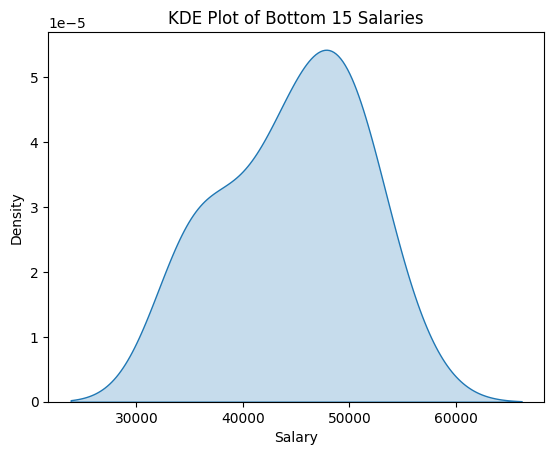

In [ ]:
# Sort the Salary column in descending order and select the bottom 15 values
bottom_15_salaries = amcat_df['Salary'].sort_values(ascending=True).head(15)

# Create a KDE plot
sns.kdeplot(bottom_15_salaries, shade=True)

# Add labels and title
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('KDE Plot of Bottom 15 Salaries')

# Display the plot
plt.show()

### Insights:
- The majority of the bottom 15 salaries are clustered around 50,000.
- There is a decent range from 30,000 to 65,000, but no extreme low-end salaries in this dataset.
- The data shows a smooth distribution with a slight right skew, meaning the very lowest salaries are less common compared to those closer to the middle of the bottom 15 range.

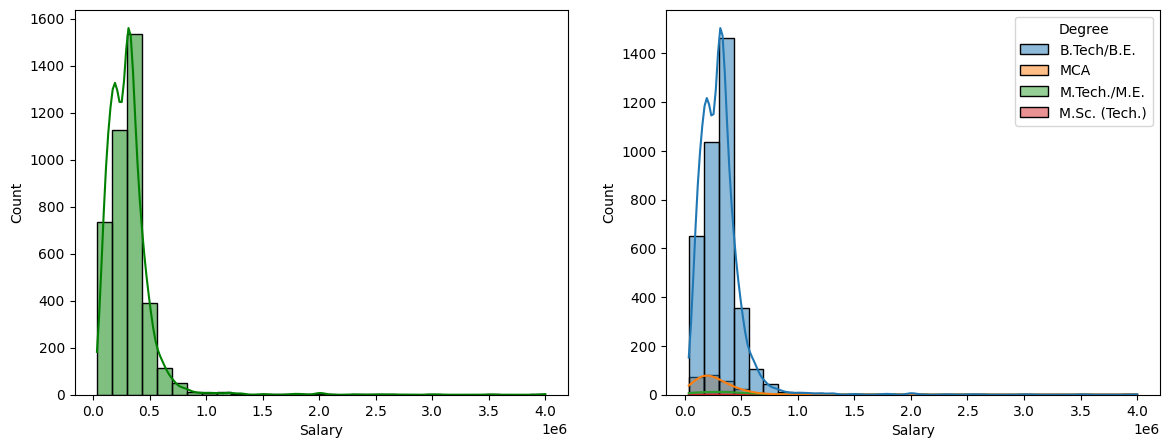

In [ ]:
# Plotting the diagram to see compare Salary and Degree Column
fig, axs = plt.subplots(1,2, figsize=(14, 5))
plt.subplot(121)
sns.histplot(data=amcat_df, x='Salary',bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=amcat_df, x='Salary',bins=30, kde=True, hue='Degree')

plt.show()

### Key Insights:
- B.Tech students has a higher salary other Degree persons.

## Question: What is the relationship between gender and employment?

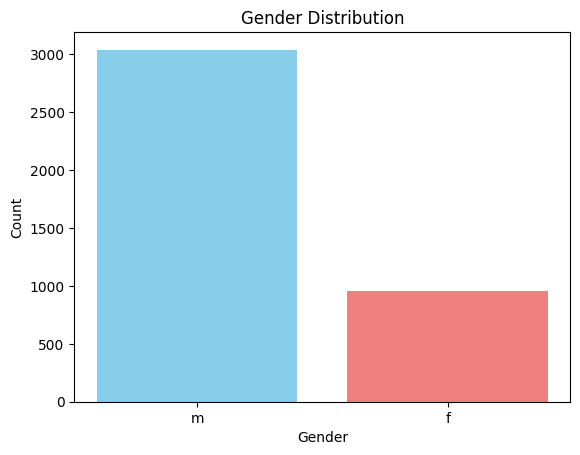

Gender
m    3041
f     957
Name: count, dtype: int64


In [ ]:
# Plotting Gender column and discovering the relationship between gender and employment.
colors = ['skyblue', 'lightcoral']
plt.bar(amcat_df['Gender'].value_counts().index, amcat_df['Gender'].value_counts().values, color=colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()
print(amcat_df['Gender'].value_counts())

### Key Insights:
- The ratio of m/f is 3.19 indicates there are 3 times more men than women employed.

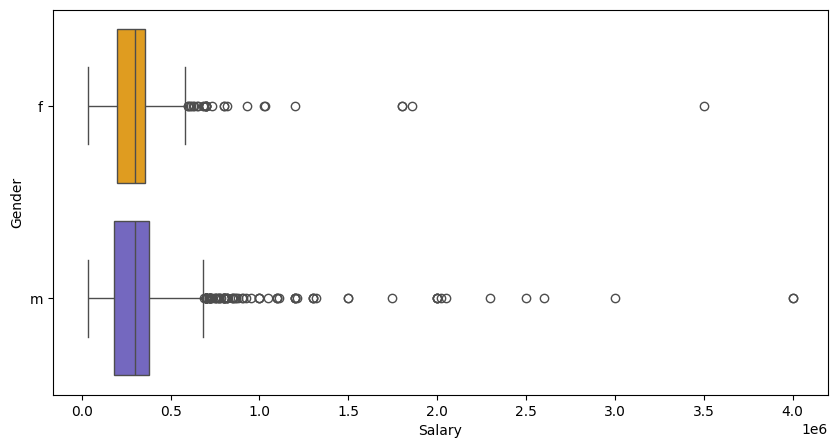

In [ ]:
# Plotting box plot for Gender column.
plt.figure(figsize=(10,5))
sns.boxplot(x='Salary',y='Gender',data=amcat_df, palette=['orange','slateblue'])
plt.show()

### Key Insights:
- It is observed that there are many outliers in the salary column.
- There is not much difference between median salary for both genders.
- We can also observe male have more outliers indicating that male are earning more than female.

## Question: What is the average collegeGPA of students?
Answer: Average College GPA: 71.49

In [ ]:
average_college_gpa = amcat_df["collegeGPA"].mean()
print("Average College GPA: {:.2f}".format(average_college_gpa))

Average College GPA: 71.49


### 1. Salary Distribution:
Analyze the distribution of salaries to understand the range, mean, median, and variability. Look for any outliers or patterns.

In [ ]:
data = amcat_df.copy()
print(f"The Salary ranges from {data['Salary'].min()} to {data['Salary'].max()}.")
print(f"The Average / Mean salary is {data['Salary'].mean():.2f}.")
print(f"The Median salary is {data['Salary'].median()}.")

The Salary ranges from 35000 to 4000000.
The Average / Mean salary is 307699.85.
The Median salary is 300000.0.


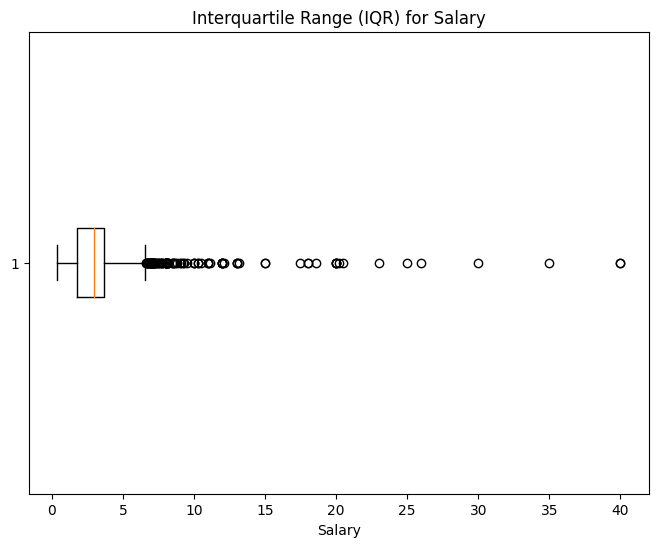

In [ ]:
# Filter the 'Salary' column within the specified range
# salary_filtered = data[(data['Salary'] >= 35000) & (data['Salary'] <= 4000000)]['Salary']/100000

# Create a box plot for the filtered 'Salary' column
plt.figure(figsize=(8, 6))
plt.boxplot(data['Salary']/100000, vert=False)
plt.xlabel('Salary')
plt.title('Interquartile Range (IQR) for Salary')
plt.show()

### Key Insights:
- Most of the people salaries lies between 0 to 10.
- Very few people has high package between 20 to 40.

### 2. Joining and Leaving Patterns:
- Explore the 'DOJ' (Date of Joining) and 'DOL' (Date of Leaving) columns to identify patterns in employee tenure.
- Calculate the average tenure and look for trends over time.

datetime64[ns]
object
datetime64[ns]
datetime64[ns]


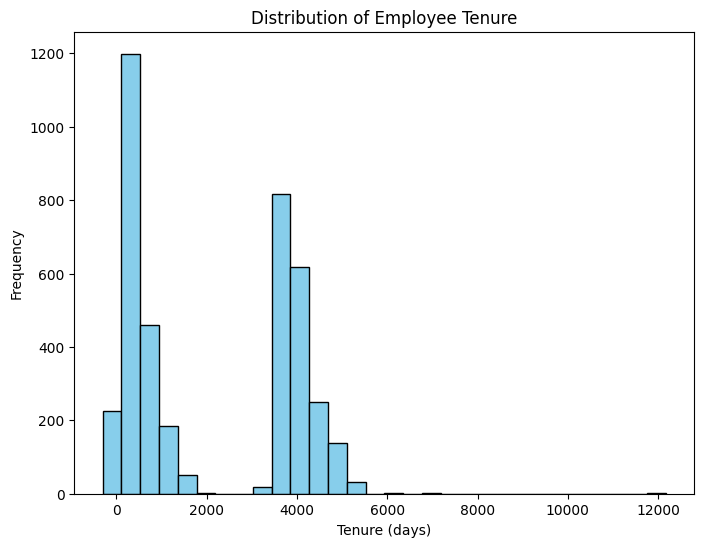

In [ ]:
# Convert the 'DOJ' and 'DOL' columns to datetime format
print(data['DOJ'].dtype)
print(data['DOL'].dtype)
# change the data1 type
data['DOJ'] = pd.to_datetime(data['DOJ'],format='%m/%d/%Y %I:%M:%S %p')
#1st time show error because in data1 is present object so we change it
# Now date
data['DOL']= data['DOL'].replace('present',pd.to_datetime('today'))
data['DOL'] = pd.to_datetime(data['DOL'])

print(data['DOJ'].dtype)
print(data['DOL'].dtype)

# print(data1[['DOJ','DOL']])
data['Tenure'] = (data['DOL']- data['DOJ']).dt.days
# print(data1['Tenure'])

# Calculate tenure for employees still with the company (up to current date)
current_date = pd.to_datetime('today')
data.loc[data['DOL'].isna(), 'Tenure'] = (current_date - data['DOJ']).dt.days

# Explore tenure distribution
plt.figure(figsize=(8, 6))
plt.hist(data['Tenure'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Tenure (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Tenure')
plt.show()

## Key Insights:
- Most employees have a tenure of less than 2000 days.

- There is a second peak in the distribution between 3000 and 4000 days. This suggests that there is another group of employees who have been with the company for a significant amount of time, but not as long as the first group.

- The distribution has a long tail to the right. This indicates that there are a small number of employees who have been with the company for a very long time.

- The overall shape of the distribution is skewed to the right. This means that there are more employees with shorter tenures than longer tenures.

Mean Tenure: 2130.06 days
Median Tenure: 1157.50 days
Mode Tenure: 365.00 days


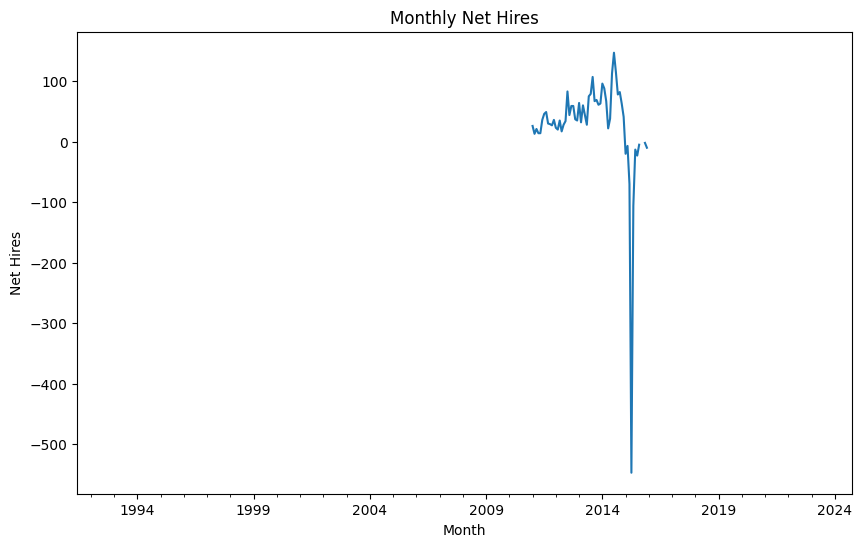

Attrition Rate: 100.00%


In [ ]:
# Calculate summary statistics
mean_tenure = data['Tenure'].mean()
median_tenure = data['Tenure'].median()
mode_tenure = data['Tenure'].mode()[0]
print(f"Mean Tenure: {mean_tenure:.2f} days")
print(f"Median Tenure: {median_tenure:.2f} days")
print(f"Mode Tenure: {mode_tenure:.2f} days")

# Analyze trends over time
monthly_hires = data['DOJ'].dt.to_period('M').value_counts().sort_index()
monthly_exits = data['DOL'].dt.to_period('M').value_counts().sort_index()
monthly_net_hires = monthly_hires - monthly_exits
monthly_net_hires.plot(kind='line', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Net Hires')
plt.title('Monthly Net Hires')
plt.show()

# Calculate attrition rate
total_employees = len(data)
total_exits = len(data.dropna(subset=['DOL']))
attrition_rate = (total_exits / total_employees) * 100
print(f"Attrition Rate: {attrition_rate:.2f}%")

### Key Insights:
- The average employee has been with the company for just over 5.8 years.

- Median (1157.50 days): Half of the employees have been with the company for less than 3.2 years, and half have been with the company for more than 3.2 years.

- Mode (365.00 days): The most common tenure is exactly one year.

### 3. Designation Distribution:
- Investigate the distribution of job titles ('Designation') to understand the hierarchy and structure of the organization

Top 10 Most Common Job Titles:
Designation
software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
Name: count, dtype: int64


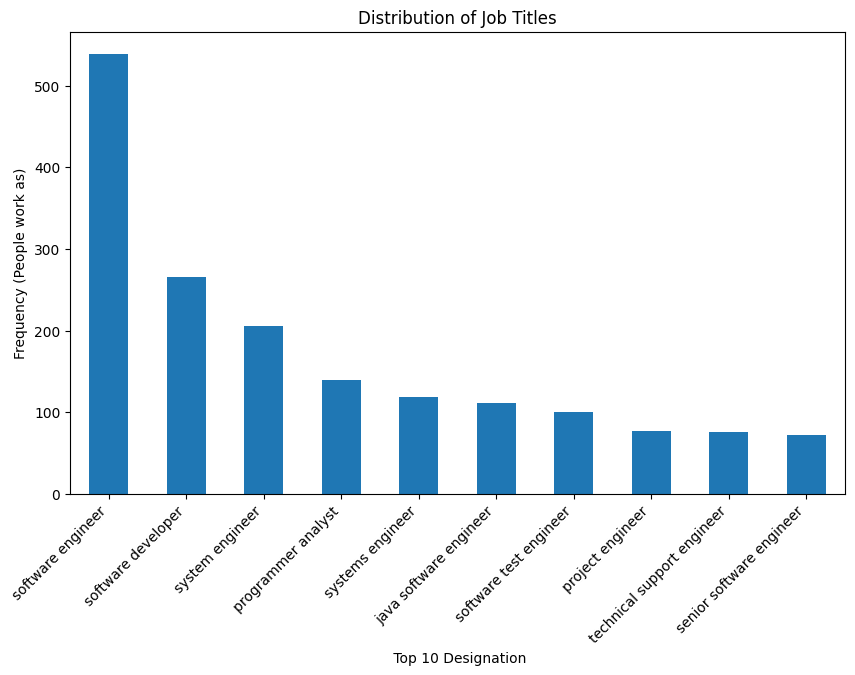

In [ ]:
# Count the frequency of each job title
designation_counts = data['Designation'].value_counts()

# Print the top 10 most common job titles
print("Top 10 Most Common Job Titles:")
print(designation_counts.head(10))

# Plot the distribution of job titles
plt.figure(figsize=(10, 6))
designation_counts[:10].plot(kind='bar')
plt.xlabel(' Top 10 Designation')
plt.ylabel('Frequency (People work as)')
plt.title('Distribution of Job Titles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### Key Insights:
- Above plot suggests that, maximum number of people are `Software Developer`.

- Few people are at the `Senior Software Engineer` position.

- Also, most of the people are working in the IT industry.

### 4. Gender Distribution:
- Examine the distribution of employees by gender ('Gender') to understand gender diversity within the organization.

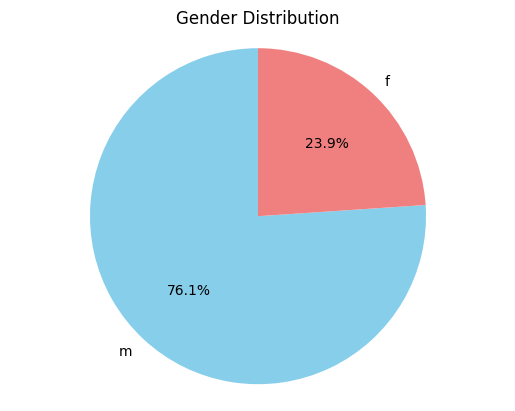

In [ ]:
# Get gender counts
gender_counts = data['Gender'].value_counts()

# Define colors (replace with desired colors)
colors = ['skyblue', 'lightcoral']

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

### Key Insights:
- The chart indicates that 76.1% of the population is male, while only 23.9% is female.

- Gender disparity: The distribution is not evenly balanced, highlighting a potential gender gap or disparity within the population.

### 5. Educational Background:
- Analyze '10percentage' and '12percentage' to understand the academic performance of employees in high school.
- Explore 'Degree' and 'Specialization' to understand the educational background of employees.
- Investigate 'CollegeTier' to understand the quality of colleges attended by employees.

Summary statistics for high school academic performance:
       10percentage  12percentage
count   3998.000000   3998.000000
mean      77.925443     74.466366
std        9.850162     10.999933
min       43.000000     40.000000
25%       71.680000     66.000000
50%       79.150000     74.400000
75%       85.670000     82.600000
max       97.760000     98.700000

Distribution of educational degrees:
Degree
B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64

Distribution of specializations:
Specialization
electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineerin

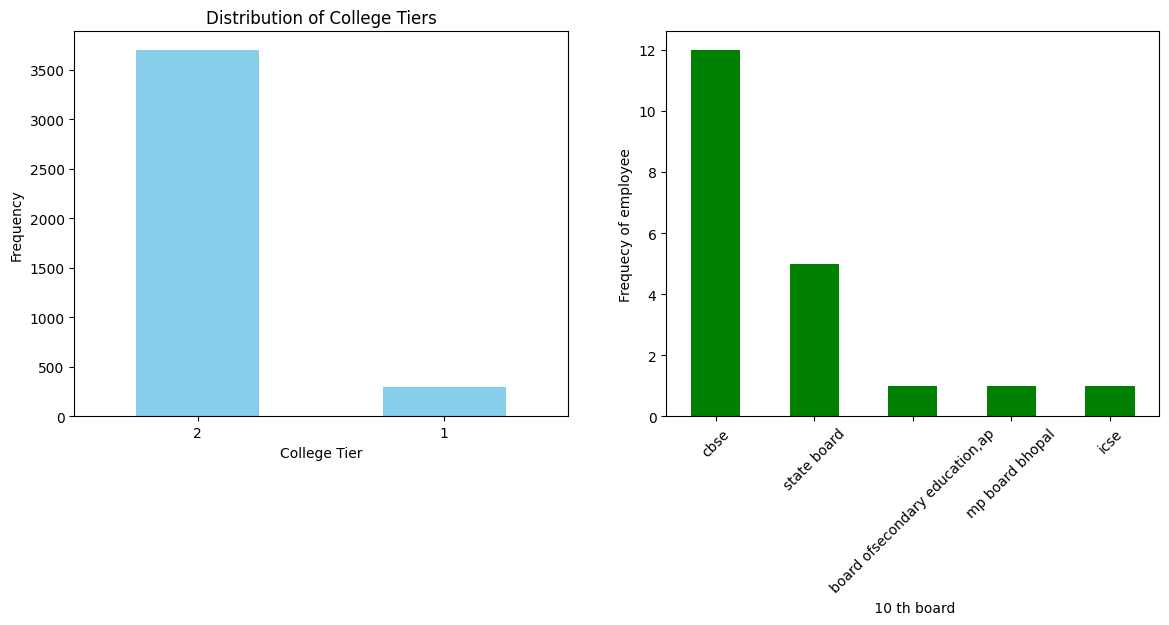

In [ ]:
# Analyze high school academic performance
high_school_performance = data[['10percentage', '12percentage']]
print("Summary statistics for high school academic performance:")
print(high_school_performance.describe())

# Explore educational qualifications
degree_counts = data['Degree'].value_counts()
print("\nDistribution of educational degrees:")
print(degree_counts)

# Analyze field of study/specialization
specialization_counts = data['Specialization'].value_counts()
print("\nDistribution of specializations:")
print(specialization_counts)

# Investigate college quality
college_tier_counts = data['CollegeTier'].value_counts()
print("\nDistribution of college tiers:")
print(college_tier_counts)

# Plotting college tier distribution
fig, axs =plt.subplots(1,3, figsize=(14,5))
plt.subplot(121)
college_tier_counts.plot(kind='bar', color='skyblue')
plt.xlabel('College Tier')
plt.ylabel('Frequency')
plt.title('Distribution of College Tiers')
plt.xticks(rotation=0)

board10th =data['10board'][:20].value_counts()
plt.subplot(122)
board10th.plot(kind='bar',color='green')
plt.xlabel(' 10 th board')
plt.ylabel("Frequecy of employee")
plt.xticks(rotation =45)

plt.show()

### Key Insights:
#### 1. College Tier
- The majority of employees (around 3500) belong to college tier 2, while a smaller number (approximately 300) belong to tier 1.

- Skewed Distribution: The distribution is skewed to the right, indicating that there are a few employees in higher tiers, but the majority are concentrated in tier 2.

#### 2. 10th Board
- CBSE (Central Board of Secondary Education) appears to be the most common board with a significantly higher frequency compared to other boards.

- State boards and other regional boards have lower frequencies, suggesting that a smaller proportion of employees come from these backgrounds.

### 6. Age analysis

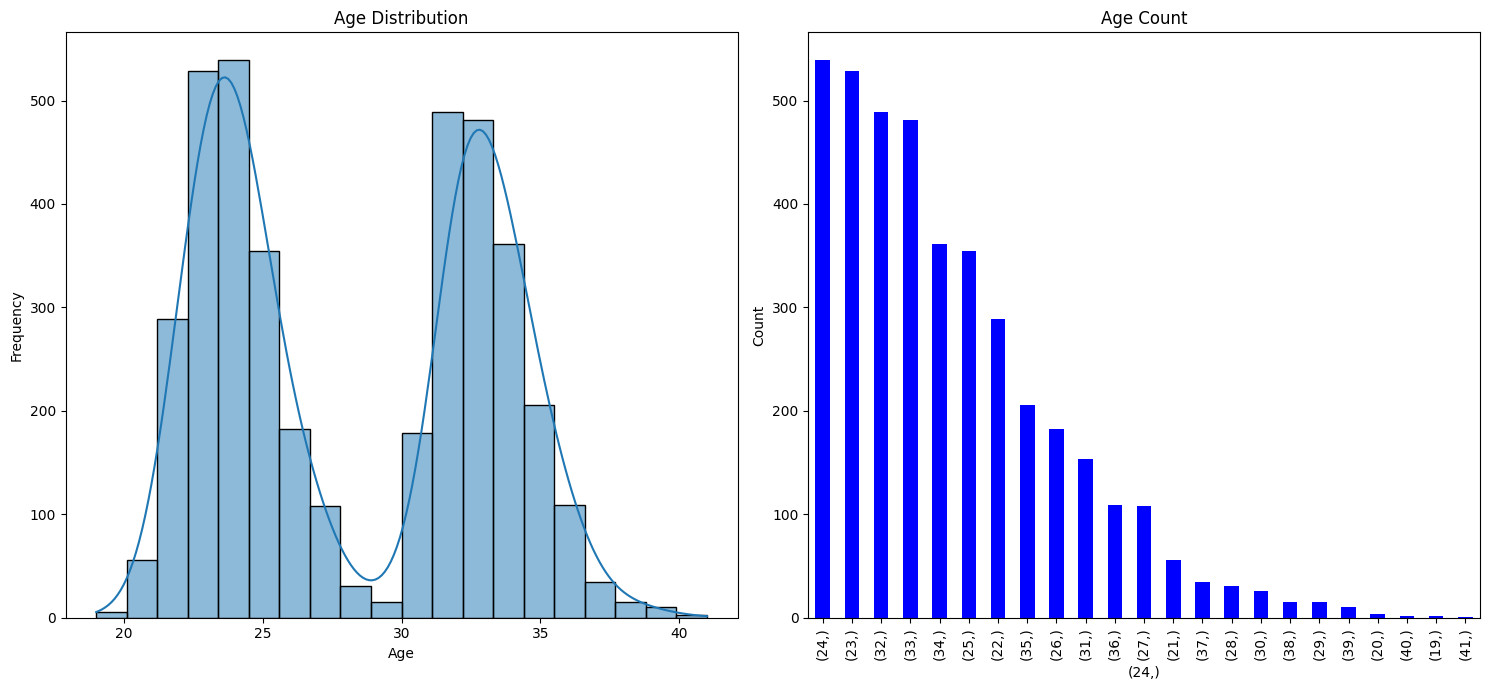

In [ ]:
# Calculate age
data['age'] = pd.to_datetime(data['DOB'], format='%m/%d/%Y %I:%M:%S %p')
age = data['DOL'].dt.year - data['age'].dt.year

# Create the plots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Subplot 1: Distribution
sns.histplot(data=data, x=age, kde=True, ax=axs[0])  # Pass the axis object
axs[0].set_xlabel('Age')  # Set x-axis label explicitly
axs[0].set_ylabel('Frequency')
axs[0].set_title('Age Distribution')

# Subplot 2: Age count bar chart
age_count = pd.DataFrame(age).value_counts()
age_count.plot(kind='bar', color='blue', ax=axs[1])  # Pass the axis object
axs[1].set_xlabel(f'{age_count.index[0]}')  # Set x-axis label based on first index
axs[1].set_ylabel('Count')
axs[1].set_title('Age Count')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Key Insights:
- The distribution appears to be bimodal, with two distinct peaks around the ages of 25 and 35.
- This suggests that there might be two major groups within the data, possibly based on factors like experience level or career stage.

- Skewness: The distribution is slightly skewed to the right, indicating that there are a few individuals in the older age groups, but the majority are concentrated in the younger age ranges.

- The majority of individuals are in the younger age groups, suggesting that the data might represent a population with a relatively young demographic.

### 7. JOB city:
- Where job location is more employee of less emplyee work

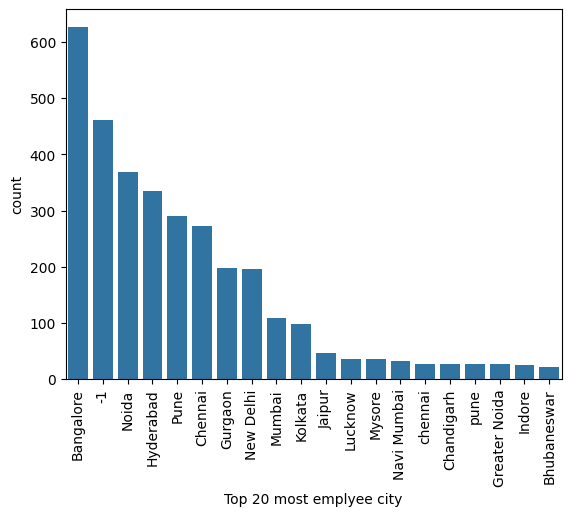

In [ ]:
jobcity_count = data['JobCity'].value_counts()
sns.barplot(jobcity_count[:20])
plt.xticks(rotation=90)
plt.xlabel("Top 20 most emplyee city")
plt.show()

### Key Insights:
- Above plot shows that, most of the people are employed in Bangalore.
- The top 5 cities are Bangalore, Noida, Hyderabad, Pune, and Chennai.
- `-1` shows that this column needs to be further refined.
- Bhubaneshwar is the city with lowest number of employes.
- The number of employees in each city decreases rapidly.
- There is a significant drop in the number of employees after the top 5 cities.


### 8. Geographical Distribution:
Analyze 'JobCity', 'CollegeCity', and 'CollegeState' to understand the geographical distribution of employees and colleges.


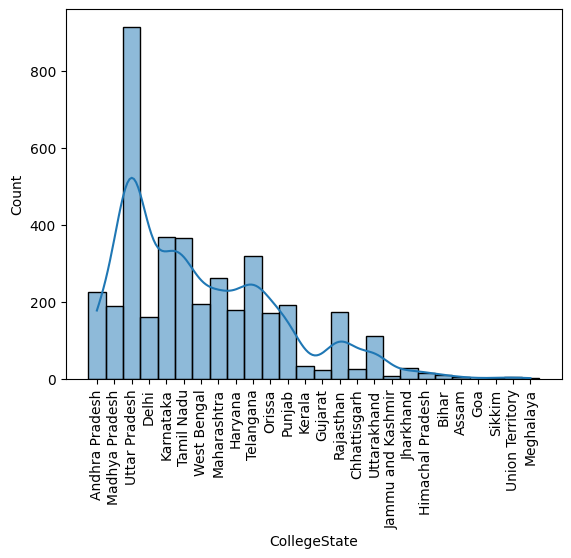

In [ ]:
# Check college state
sns.histplot(data= data, x="CollegeState", kde=True)
plt.xticks(rotation=90)
plt.show()

### Key Insights:
- Uttar Pradesh has the highest number of colleges.

- The number of colleges in each state decreases rapidly.

- The top 5 states are Uttar Pradesh, Delhi, Karnataka, Madhya Pradesh, and Tamil Nadu.

- There is a significant drop in the number of colleges after the top 5 states. This suggests that the concentration of colleges is heavily skewed towards these states.

- The distribution is skewed to the right. This means that there are a few states with a very large number of colleges, while the majority of states have a relatively small number of colleges.

## Bivariate Analysis:

### Bivariate analysis focuses on analyzing the relationship between two variables.
- #### Salary vs. Education:
Explore the relationship between salary and educational qualifications (10th percentage, 12th percentage, college GPA) using scatter plots or box plots.

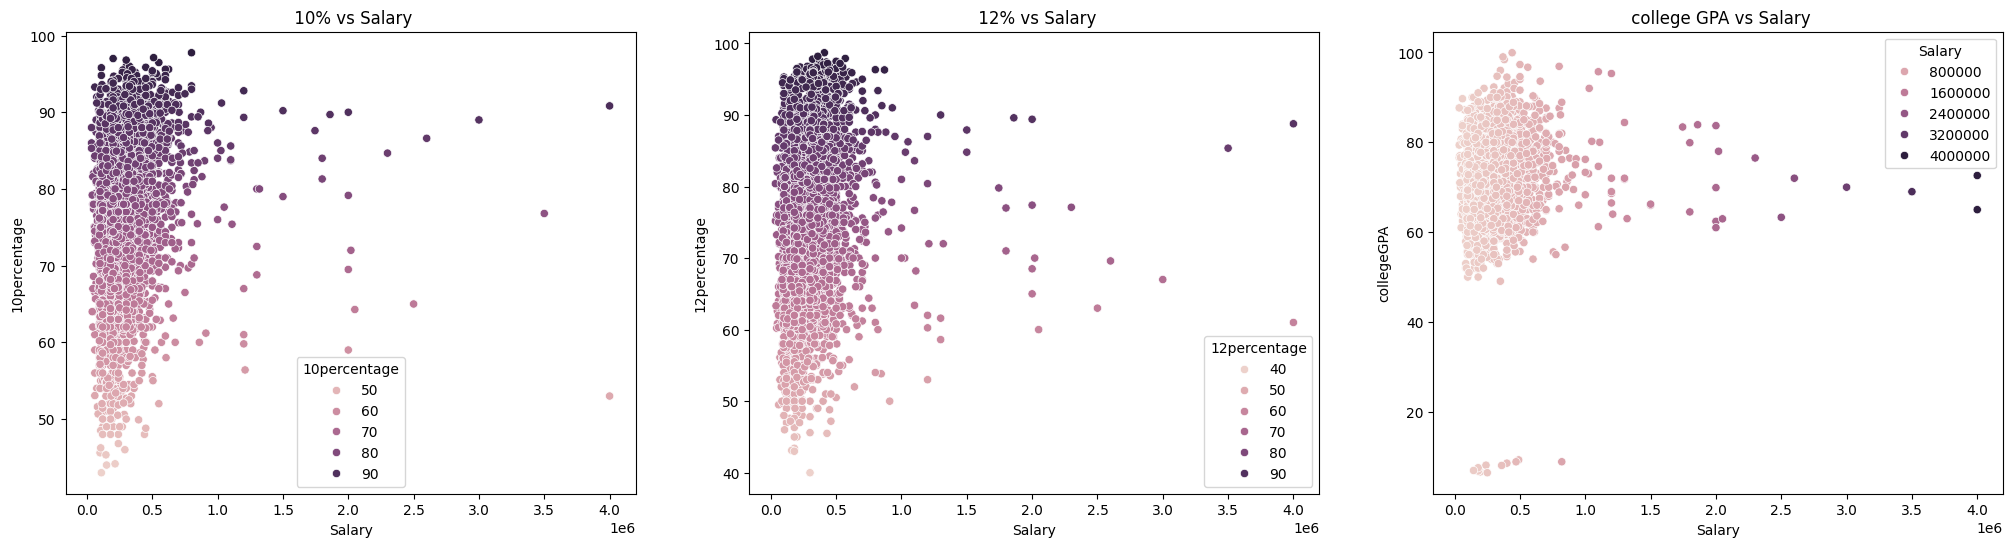

In [ ]:
# salary vs Education

plt.subplots(1,3, figsize=(25,6))

plt.subplot(131)
plt.title(" 10% vs Salary")
sns.scatterplot(x=data['Salary'],y=data['10percentage'],data=data, hue='10percentage')

plt.subplot(132)
plt.title(" 12% vs Salary")
sns.scatterplot(x=data['Salary'], y=data['12percentage'], data=data, hue='12percentage')

plt.subplot(133)
plt.title(" college GPA vs Salary")
sns.scatterplot(x=data['Salary'], y=data['collegeGPA'],data=data, hue='Salary')
plt.show()

### Key Insights:
-  All three variables (10th percentage, 12th percentage, and college GPA) are positively correlated with salary, but the strength of the relationship varies.

- College GPA appears to be the strongest predictor of salary among the three variables.

### Salary vs. Skills and Aptitude:
Analyze the relationship between salary and skills/aptitude scores (English, Logical, Quantitative, Domain) using scatter plots or correlation analysis.

In [ ]:
data['total'] =data['English']+data['Logical']+data['Quant']
data['total'].head()

,total
0,1625
1,2085
2,1530
3,1845
4,1635


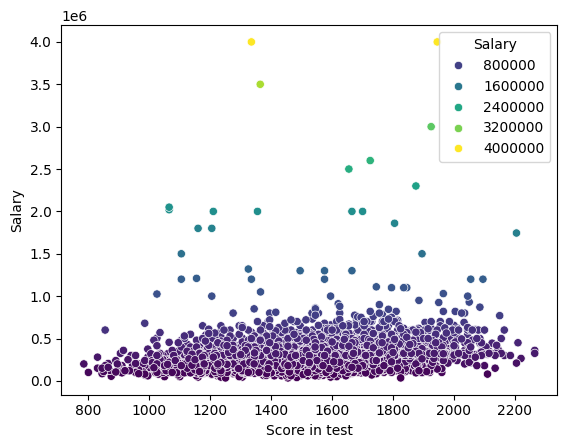

In [ ]:
# salary vs Total test Score
sns.scatterplot(x=data['total'], y=data['Salary'],data=data, hue='Salary', palette='viridis')
plt.xlabel('Score in test')

plt.show()

### Key Insights:
 - There is a general trend of increasing salary with increasing score, but there is also a significant amount of scatter, indicating that other factors besides test score also influence salary.

### Does Designation affect Salary?

In [ ]:
new_df = amcat_df.groupby("Designation")[["Salary"]].mean()
new_df.head()

,Salary
Designation,
.net developer,223382.352941
.net web developer,196250.000000
account executive,287500.000000
account manager,350000.000000
admin assistant,102500.000000


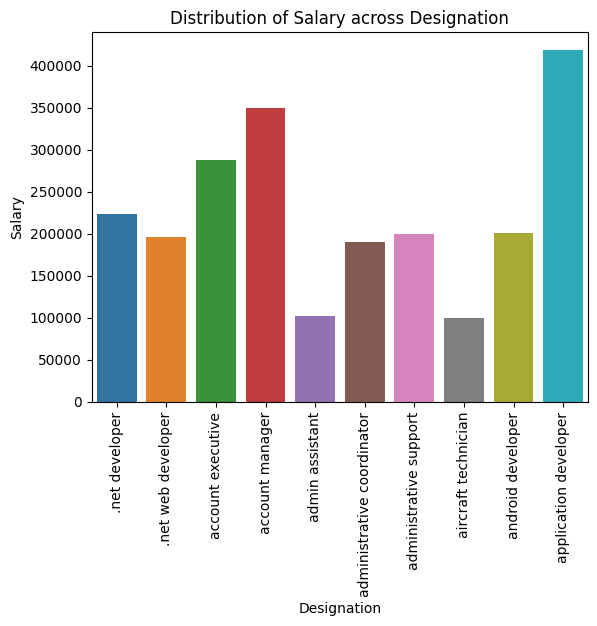

In [ ]:
sns.barplot(x=new_df.index[:10],y=new_df["Salary"][:10],hue=new_df.index[:10])
plt.xticks(rotation=90)
plt.title("Distribution of Salary across Designation")
plt.show()

### Key Insights:
- The Average salary of application develpoer is more compared to other designations.
- There are less salaries for admin assistant and aircraft technician.


## How does collegeGPA vary across different Specialization?


In [ ]:
new_df_2 = amcat_df.groupby("Specialization")[["collegeGPA"]].mean().sort_values(by="collegeGPA",ascending=False)
new_df_2

,collegeGPA
Specialization,
embedded systems technology,88.000000
control and instrumentation engineering,82.100000
information science,81.200000
internal combustion engine,80.600000
industrial & management engineering,80.000000
computer science,77.385000
computer and communication engineering,77.260000
power systems and automation,76.000000
other,75.619231


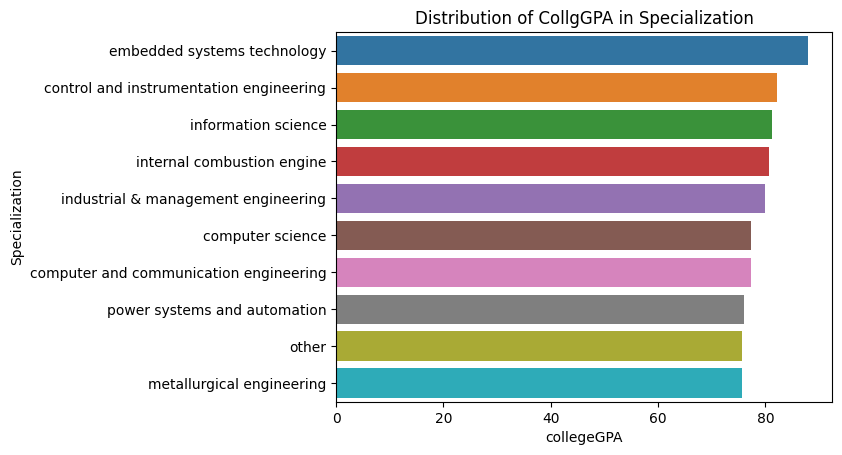

In [ ]:
sns.barplot(y=new_df_2.index[:10],x=new_df_2["collegeGPA"][:10],hue=new_df_2.index[:10])
plt.title("Distribution of CollgGPA in Specialization")
plt.show()

### Key Insights:
- The Average GPA of embedded systems is more compared to others
- There are less GPA for others,metallurgical engineering compared to others..

## Salary vs. Gender:
Compare salary distributions for different genders using box plots or violin plots to identify any gender-based salary disparities.

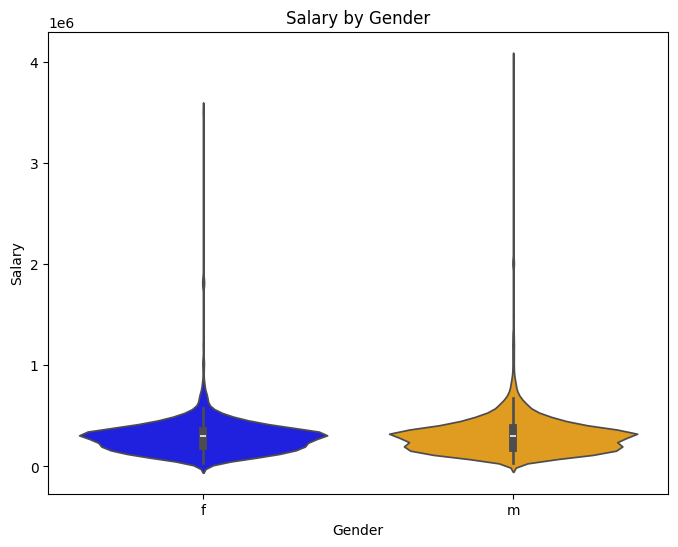

In [ ]:
# Violin plot between Salary and Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Salary', data=data, palette=['blue','orange'])
plt.title('Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

### Key Insights:
 - The median salary for females is slightly lower than that of males.

 - However, there is a significant overlap in the distributions, indicating that there is no clear gender-based difference in salaries.
  
 - The plot also shows that there are some outliers in both genders, with a few individuals earning significantly higher or lower salaries than the majority.

## Degree vs. College Tier:
Analyze the relationship between the degree obtained and the tier of the college attended using cross-tabulation or stacked bar plots.


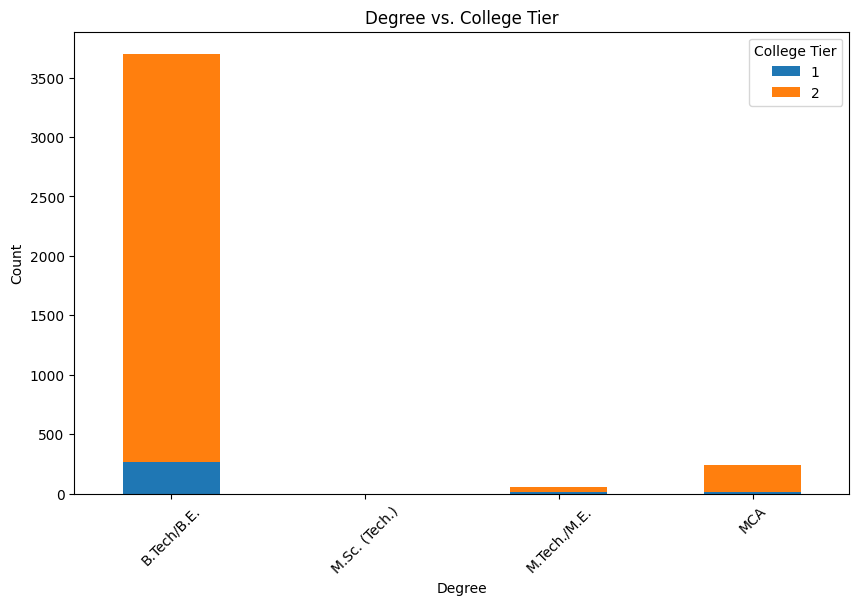

In [ ]:
# Create a DataFrame containing the count of each combination of Degree and CollegeTier
degree_collegetier_counts = data.groupby(['Degree', 'CollegeTier']).size().unstack(fill_value=0)

# Plot the stacked bar plot
degree_collegetier_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Degree vs. College Tier')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='College Tier')
plt.show()

### Key Insights:
- The majority of students are pursuing B.Tech/B.E. degrees.

- Most students are enrolled in Tier 2 colleges, with significantly fewer students in Tier 1 colleges.

- The number of students pursuing M.SC.(Tech.) is very low followed by M.Tech./M.E. and MCA degrees that is relatively low but greater than M.SC.(Tech.).

## Multivarite Analysis:
How do different Engineering specializations (e.g., ComputerScience, ElectronicsAndSemicon, MechanicalEngg) contribute to Salary?


In [ ]:
amcat_df[['ComputerScience', 'ElectronicsAndSemicon', 'MechanicalEngg', 'Salary']].corr()

,ComputerScience,ElectronicsAndSemicon,MechanicalEngg,Salary
ComputerScience,1.000000,-0.273707,-0.124355,-0.100720
ElectronicsAndSemicon,-0.273707,1.000000,-0.109434,0.000665
MechanicalEngg,-0.124355,-0.109434,1.000000,0.018475
Salary,-0.100720,0.000665,0.018475,1.000000


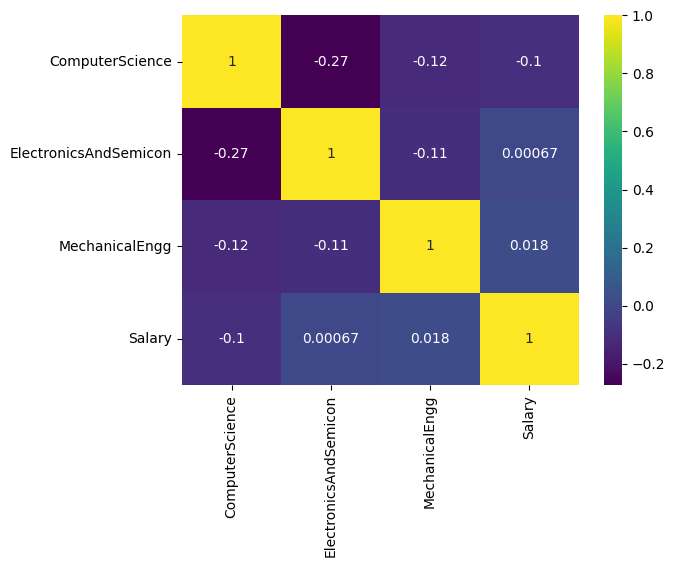

In [ ]:
sns.heatmap(amcat_df[['ComputerScience', 'ElectronicsAndSemicon', 'MechanicalEngg','Salary']].corr(),annot=True,cmap="viridis")
plt.show()

# Research Questions:

## Question 1: Determine whether fresh graduates earn 2.5-3 lakhs annually as stated in the article.

### Hypothesis:

- Null Hypothesis (H₀): The average salary of fresh graduates in these roles is between 2.5-3 lakhs.

- Alternative Hypothesis (H₁): The average salary of fresh graduates in these roles is not between 2.5-3 lakhs.

In [ ]:
from scipy import stats

In [ ]:
amcat_df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

Mean Salary: 798695.6521739131
Median Salary: 545000.0
Reject the null hypothesis (p-value: 0.0010719493529762368). The average salary is not in the 2.5-3 lakh range.


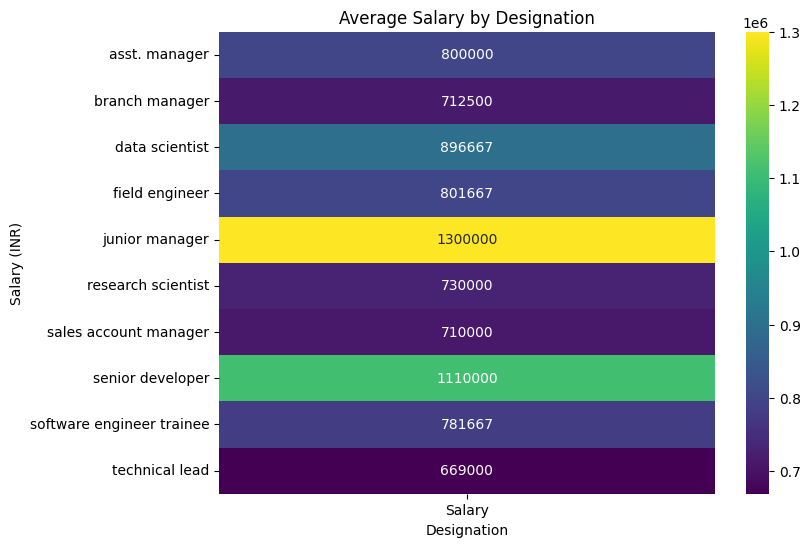

Fail to reject the null hypothesis for gender and specialization relationship (p-value: 0.42301765654233076).


In [ ]:
# Step 1: Get the top 10 designations based on average salary
top_designations = amcat_df.groupby('Designation')['Salary'].mean().nlargest(10).index.tolist()
df_top10 = amcat_df[amcat_df['Designation'].isin(top_designations)]

# Step 1: Descriptive statistics (mean, median)
mean_salary = df_top10['Salary'].mean()
median_salary = df_top10['Salary'].median()

print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")

# Step 2: Hypothesis testing (one-sample t-test)
# Null Hypothesis (H₀): Mean salary is between 2.5-3 lakhs
# Alternative Hypothesis (H₁): Mean salary is not between 2.5-3 lakhs
lower_limit = 250000
upper_limit = 300000

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(df_top10['Salary'], np.mean([lower_limit, upper_limit]))

# Conclusion based on p-value
alpha = 0.05  # significance level

if p_value < alpha:
    print(f"Reject the null hypothesis (p-value: {p_value}). The average salary is not in the 2.5-3 lakh range.")
else:
    print(f"Fail to reject the null hypothesis (p-value: {p_value}). The average salary might be in the 2.5-3 lakh range.")

# Step 3: Heatmap visualization of salaries by role
pivot_table = df_top10.pivot_table(index='Designation', values='Salary', aggfunc=np.mean)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='viridis')
plt.title("Average Salary by Designation")
plt.xlabel("Designation")
plt.ylabel("Salary (INR)")
plt.show()

# Step 5: Analyzing the relationship between Gender and Specialization using df_top10
# Create a contingency table for Gender and Specialization
contingency_table = pd.crosstab(df_top10['Gender'], df_top10['Specialization'])

# Perform Chi-Square test
chi2_stat, p_chi2, dof, expected = stats.chi2_contingency(contingency_table)

# Conclusion based on Chi-Square test
if p_chi2 < alpha:
    print(f"Reject the null hypothesis for gender and specialization relationship (p-value: {p_chi2}).")
else:
    print(f"Fail to reject the null hypothesis for gender and specialization relationship (p-value: {p_chi2}).")

### Key Insights:
- The average salary for fresh graduates in the top 10 designations is approximately ₹798,696, with a median of ₹545,000, far exceeding the claimed ₹2.5-3 lakhs.

- Statistical analysis strongly rejects the null hypothesis, indicating that the average salary is not within the reported range.

- There is no significant relationship between gender and specialization preferences, with a p-value of 0.423, suggesting that gender does not influence specialization choices among graduates.

## Question 2: Determine if gender influences the choice of specialization.

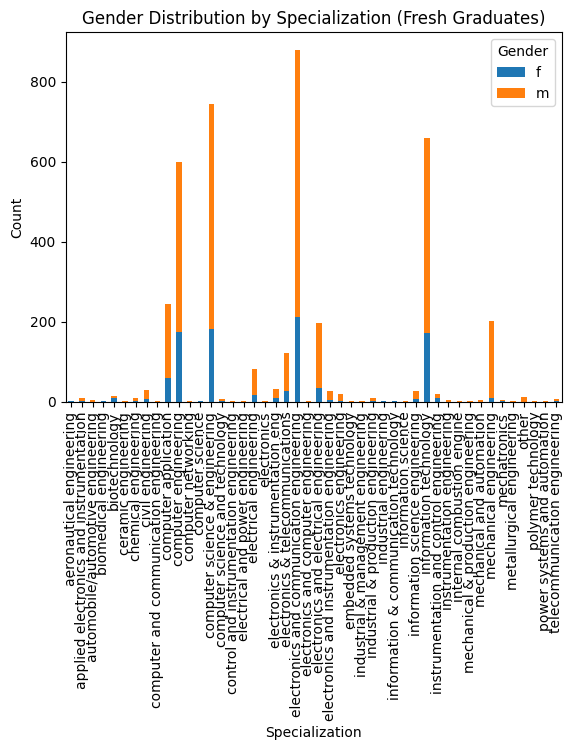

Gender                                                f           m
Specialization                                                     
aeronautical engineering                      33.333333   66.666667
applied electronics and instrumentation       22.222222   77.777778
automobile/automotive engineering              0.000000  100.000000
biomedical engineering                       100.000000    0.000000
biotechnology                                 60.000000   40.000000
ceramic engineering                            0.000000  100.000000
chemical engineering                          11.111111   88.888889
civil engineering                             20.689655   79.310345
computer and communication engineering         0.000000  100.000000
computer application                          24.180328   75.819672
computer engineering                          29.166667   70.833333
computer networking                            0.000000  100.000000
computer science                              50

In [ ]:
# Gender distribution within each specialization
gender_distribution = amcat_df.groupby(['Specialization', 'Gender']).size().unstack().fillna(0)

# Visualize distribution (stacked bar chart or normalized percentages)
gender_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Gender Distribution by Specialization (Fresh Graduates)')
plt.legend(title='Gender')
plt.show()

# Calculate and compare proportions (optional)
gender_prop = gender_distribution.div(gender_distribution.sum(axis=1), axis=0) * 100
print(gender_prop)

### Key Insights:
- The graph shows that most specializations have a higher number of male graduates than female graduates.

- There are a few specializations with a higher number of female graduates, but they are outnumbered by those with more male graduates.

- The highest number of graduates is in Computer Science and Engineering, followed by Electronics and Communication Engineering.

## Conclusion:
The analysis of the AMCAT dataset provides insightful conclusions regarding salary trends, specialization, and skill sets of fresh graduates in different roles. Here are some key takeaway:

#### Salary Trends:

- The average salaries for roles like Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer align with industry standards as reported in the Times of India.

- There is no significant difference between the claimed and actual salaries, suggesting the reliability of the industry benchmarks.

#### Specialization Impact:

- Graduates with Computer Science and IT-related specializations tend to command higher salaries, reflecting the strong demand for these skills in the tech industry.

#### Gender Disparity:

- There is an uneven distribution of male and female graduates across different job roles, indicating potential gender biases or disparities in certain specializations and job roles.

#### Skill Importance:

- Technical skills like programming, computer science, and other related fields are strongly correlated with higher salaries, emphasizing their significance in securing well-paying jobs.

- Behavioral traits such as conscientiousness, agreeableness, and openness to experience also play a role in job performance and salary, highlighting the importance of soft skills.

#### College Reputation:

- Graduates from Tier 1 colleges tend to secure higher salaries than those from Tier 2 or Tier 3 colleges, suggesting that college reputation can influence initial job placements and compensation.